<a href="https://colab.research.google.com/github/dandamudi-geeta/Quantum-Computing/blob/main/2348512_QC(Lab2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.8 MB/s eta 0:00:00


In [2]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=89bf3808b88427517e3bc48ad67bbedf3625ed5efc581c8aa3783f2c3f540f71
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [3]:
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from numpy import sqrt
#import matplotlib.pyplot as plt
import pylatexenc
import numpy as np

Quantum Operations Overview
The operations mentioned are:

X: Pauli-X gate (NOT gate)

Y: Pauli-Y gate

Z: Pauli-Z gate

H: Hadamard gate

S: Phase gate (also known as the S gate)

T: T-gate (Pi/8 gate)

In [4]:

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])
S = Operator([[1, 0], [0, 1j]])
T = Operator([[1, 0], [0, (1.0+1.0j)/sqrt(2)]])

v = Statevector([0,1])


In [5]:

print("Initial State Vector |1>:")
print(v)

Initial State Vector |1>:
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [6]:

v = X @ v

print("\nState after applying X gate:")
print(v)


State after applying X gate:
Operator([[0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:

v = Z @ v

print("\nState after applying Z gate:")
print(v)


In [7]:

v = H @ v

print("\nState after applying H gate:")
print(v)


State after applying H gate:
Operator([[0.        +0.j, 0.70710678+0.j],
          [0.        +0.j, 0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))


In [8]:

v = S @ v

print("\nState after applying S gate:")
print(v)


State after applying S gate:
Operator([[0.        +0.j        , 0.70710678+0.j        ],
          [0.        +0.j        , 0.        +0.70710678j]],
         input_dims=(2,), output_dims=(2,))


In [9]:

v = T @ v

print("\nState after applying T gate:")
print(v)


State after applying T gate:
Operator([[ 0.        +0.j ,  0.70710678+0.j ],
          [ 0.        +0.j , -0.5       +0.5j]],
         input_dims=(2,), output_dims=(2,))


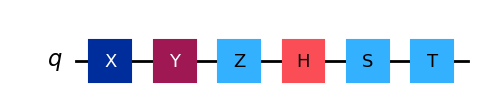

In [10]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.y(0)
circuit.z(0)
circuit.h(0)
circuit.s(0)
circuit.t(0)

display(circuit.draw(output='mpl'))

In [11]:

ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw("text")

[0. -0.70710678j,0.5+0.5j       ]

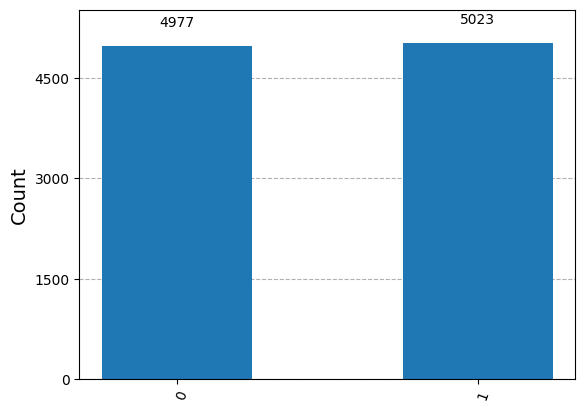

In [12]:

stats = v.sample_counts(10000)
plot_histogram(stats)

In [13]:
R = H @ S @ H

In [14]:
print("R = H * S * H matrix:")
print(R)

R = H * S * H matrix:
Operator([[0.5+0.5j, 0.5-0.5j],
          [0.5-0.5j, 0.5+0.5j]],
         input_dims=(2,), output_dims=(2,))


In [15]:
RD = np.conjugate(R).T
identity = R @ RD


In [16]:
print("\nR * R^†:")
print(identity)


R * R^†:
Operator([[1.+0.00000000e+00j, 0.-2.46519033e-32j],
          [0.+2.46519033e-32j, 1.+0.00000000e+00j]],
         input_dims=(2,), output_dims=(2,))


In [17]:
uni = np.allclose(identity, np.eye(2))
uni

True